In [4]:
# import necessary libraries
import numpy as np 
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')  
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
#from plotnine import *
import io
# to predictive A
import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from  sklearn.metrics import mean_absolute_error

In [5]:
df = pd.read_csv('C:/Users/82105/Downloads/sales_data.csv', encoding='unicode_escape')

In [6]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## prophet은
1. 변수가 필요없다.
2. 시계열과 y값(예측값)만 필요하다.
3. prophet을 사용할 때 특정 컬럼으로 만들어야 한다.

## 실제로 미래의 값을 예측해서 그 값이 나오는지 확인

In [7]:
import pandas as pd

In [8]:
pd.to_datetime(df['InvoiceDate'])

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [10]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


sales data : 총 주문 예측

In [11]:
df_1 = df.copy()

In [12]:
df_1 = df_1[df_1.Quantity > 0] ## 수량이 마이너스인 값 제거

In [13]:
df_1 = df_1[df_1.UnitPrice > 0]

In [15]:
df_1['Q_price'] = df_1['Quantity'] * df_1['UnitPrice']

In [16]:
df_1 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Q_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


총 주문 예측

In [17]:
df_1= df_1[['InvoiceDate','Q_price']] # 두 가지 변수로만 가지고 시계열을 예측

In [18]:
# 시계열값은 ds, 예측값(내가 예측하고 싶은 값, y) y

df_1.rename(columns={'InvoiceDate':'ds','Q_price':'y'},inplace=True)

In [19]:
df_1

,ds,y
0,2010-12-01 08:26:00,15.30
1,2010-12-01 08:26:00,20.34
2,2010-12-01 08:26:00,22.00
3,2010-12-01 08:26:00,20.34
4,2010-12-01 08:26:00,20.34
...,...,...
541904,2011-12-09 12:50:00,10.20
541905,2011-12-09 12:50:00,12.60
541906,2011-12-09 12:50:00,16.60
541907,2011-12-09 12:50:00,16.60


<AxesSubplot:>

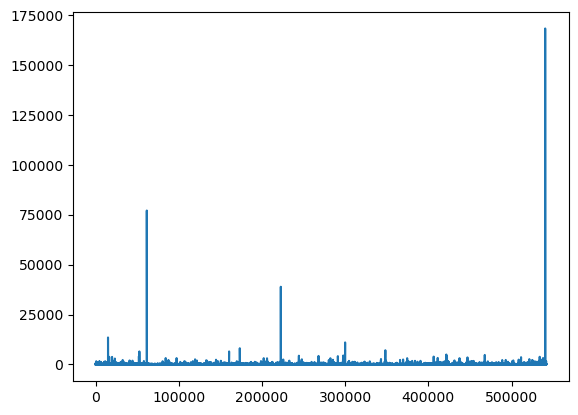

In [20]:
df_1.y.plot()
## 축을 조정해서 트렌드가 어떤 경향을 보이는지 꼭 체크
## 시계열데이터는 결국 과거에 대한 패턴을 학습하여 미래를 예측 
## 과거 데이터로 지금까지 트렌드가 우상향하는 증가인지, 감소하는지 
## 실제값이 나왔을 때 트렌드와 함께 비교해서 맞는지?

In [21]:
df_1 = df_1.set_index('ds') 

In [22]:
df_2 = df_1.resample('D').sum()

In [23]:
df_2

,y
ds,
2010-12-01,58960.79
2010-12-02,47748.38
2010-12-03,46943.71
2010-12-04,0.00
2010-12-05,31774.95
...,...
2011-12-05,88741.96
2011-12-06,56713.21
2011-12-07,75439.16


인덱스를 풀고 진행

In [24]:
df_2.reset_index(inplace=True)

In [28]:
## train, test 나눠야 함

train = df_2[:270]
test = df_2[270:]

In [29]:
## 프로펫으로 시계열 분석을 진행

prophet = Prophet(daily_seasonality = True, growth='linear')

prophet.fit(train)

23:17:05 - cmdstanpy - INFO - Chain [1] start processing
23:17:05 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
future =prophet.make_future_dataframe(periods=30) ## 뒤에 얼마나 예측할 것인지
forecast = prophet.predict(future)

In [34]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-01,52600.202728,14798.520510,48228.451307,52600.202728,52600.202728,-20345.547749,-20345.547749,-20345.547749,-25218.666108,-25218.666108,-25218.666108,4873.118360,4873.118360,4873.118360,0.0,0.0,0.0,32254.654979
1,2010-12-02,52469.212571,23818.471431,55971.695778,52469.212571,52469.212571,-13639.598425,-13639.598425,-13639.598425,-25218.666108,-25218.666108,-25218.666108,11579.067683,11579.067683,11579.067683,0.0,0.0,0.0,38829.614146
2,2010-12-03,52338.222415,14128.455089,45389.929952,52338.222415,52338.222415,-23172.325186,-23172.325186,-23172.325186,-25218.666108,-25218.666108,-25218.666108,2046.340922,2046.340922,2046.340922,0.0,0.0,0.0,29165.897229
3,2010-12-04,52207.232259,-11254.700088,21158.284459,52207.232259,52207.232259,-48355.632332,-48355.632332,-48355.632332,-25218.666108,-25218.666108,-25218.666108,-23136.966224,-23136.966224,-23136.966224,0.0,0.0,0.0,3851.599927
4,2010-12-05,52076.242103,-1076.441445,32803.425465,52076.242103,52076.242103,-36383.181202,-36383.181202,-36383.181202,-25218.666108,-25218.666108,-25218.666108,-11164.515094,-11164.515094,-11164.515094,0.0,0.0,0.0,15693.060901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2011-09-22,50325.576067,20527.746222,53301.822295,50111.952348,50544.774699,-13639.598425,-13639.598425,-13639.598425,-25218.666108,-25218.666108,-25218.666108,11579.067683,11579.067683,11579.067683,0.0,0.0,0.0,36685.977642
296,2011-09-23,50342.877748,11763.770638,43100.168801,50113.941409,50573.961857,-23172.325186,-23172.325186,-23172.325186,-25218.666108,-25218.666108,-25218.666108,2046.340922,2046.340922,2046.340922,0.0,0.0,0.0,27170.552562
297,2011-09-24,50360.179429,-14207.189527,17686.611680,50115.863548,50603.705531,-48355.632332,-48355.632332,-48355.632332,-25218.666108,-25218.666108,-25218.666108,-23136.966224,-23136.966224,-23136.966224,0.0,0.0,0.0,2004.547098
298,2011-09-25,50377.481111,-2043.443840,30308.695100,50119.954443,50638.903515,-36383.181202,-36383.181202,-36383.181202,-25218.666108,-25218.666108,-25218.666108,-11164.515094,-11164.515094,-11164.515094,0.0,0.0,0.0,13994.299909


In [31]:
forecast[['ds','yhat']][270:300] ## 실제 프로펫이 예측한 값

,ds,yhat
270,2011-08-28,13509.852832
271,2011-08-29,27022.042971
272,2011-08-30,38181.552276
273,2011-08-31,29599.391329
274,2011-09-01,36322.642334
275,2011-09-02,26807.217254
276,2011-09-03,1641.211790
277,2011-09-04,13630.964601
278,2011-09-05,27143.154741
279,2011-09-06,38302.664045


In [33]:
df_2[270:300] ## 실제 매출값

,ds,y
270,2011-08-28,10805.030
271,2011-08-29,0.000
272,2011-08-30,31866.310
273,2011-08-31,25380.170
274,2011-09-01,37370.150
275,2011-09-02,42322.020
276,2011-09-03,0.000
277,2011-09-04,17119.590
278,2011-09-05,37157.140
279,2011-09-06,28349.910


## 필수과제 
- prophet에 대한 파라미터를 모두 다 정리해 주시고
- 실제 파라미터를 넣어서 예측값을 고도화 시켜주세요
- 모두 예측값을 만들어서 실제값과 비교해서 오차율을 계산해 주세요. (오차율계산법 확인)
- 기본으로만 사용했던 prophet 예측값과, 실제 파라미터를 튜닝햇을때 예측값을 비교하고
- 어떤 파라미터가 실제값에 영향을 주었는지 정리하고 발표해 주세요!